# 선 그래프 (Line plot) 그리기
## 선 그래프(꺽은선 그래프)
- 점과 점을 선으로 연결한 그래프
- 시간의 흐름에 따른 변화를 표현할 때 많이 사용한다. (시계열)
- `plot([x], y)` 
    - 1번인수 : x값(생략가능), 2번인수 y값
    - 인수가 하나인 경우 y 축의 값으로 설정되고 X값은 (0 ~ len(y)-1) 범위로 지정된다.
    - x와 y의 원소개수는 같아야 한다.
- 하나의 axes(subplot)에 여러 개의 선 그리기
    - 같은 axes에 plot()를 여러번 실행한다.
- 선 스타일
    - linestyle 속성에 설정
    - https://matplotlib.org/3.0.3/gallery/lines_bars_and_markers/line_styles_reference.html    

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/서울시 연도별 황사 경보발령 현황.csv', 
                     index_col=0) # 년도를 index name 지정(행 식별자.)
df.shape

(12, 6)

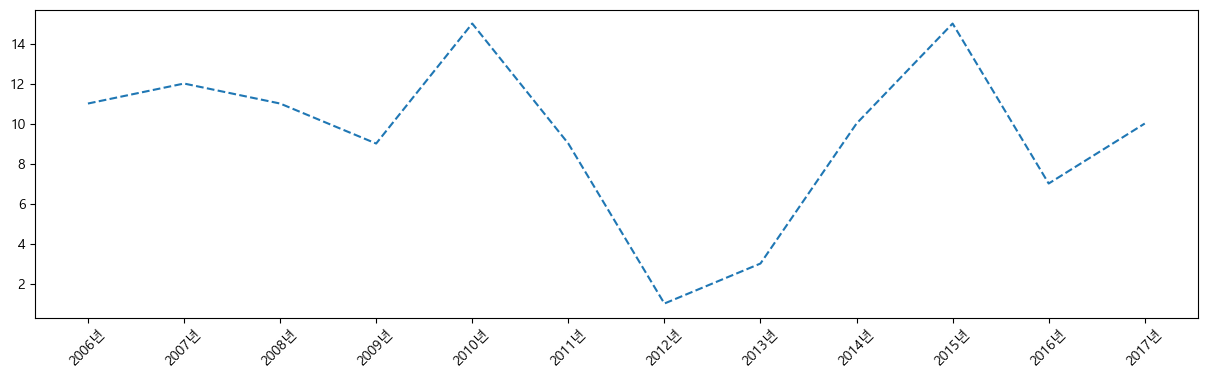

In [18]:
## 년도별 관측일수의 변화 흐름.
plt.figure(figsize=(15, 4))
plt.plot(df.index, df['관측일수'], 
          # linestyle=":"
         # linestyle="-."
         linestyle="--"
        )

# 눈금(ticks)을  어디에 표시할지 지정.
plt.xticks(range(2006, 2018),   # 눈금 위치 값들
           labels=[str(v)+"년" for v in range(2006, 2018)],  # 눈금의 label
           rotation=45) # label을 몇도 회전시킬지
# plt.xticks([2010, 2015])
plt.show()

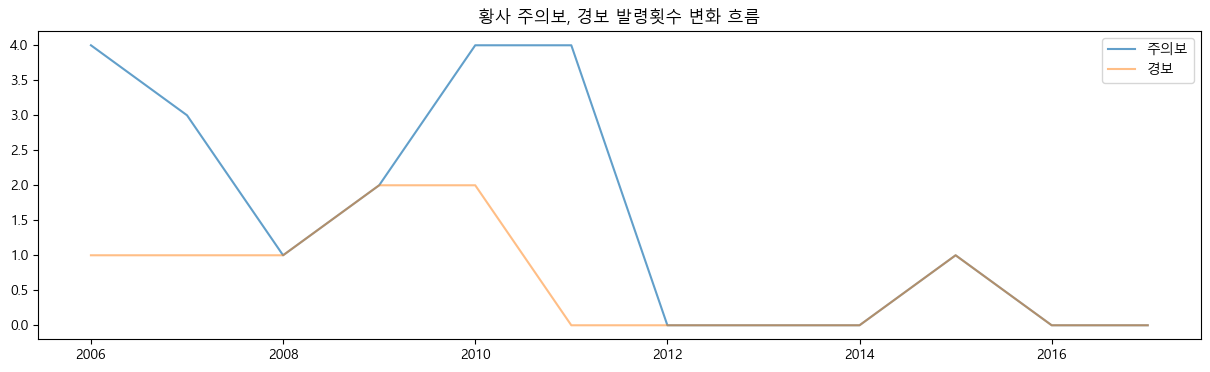

In [22]:
# 주의보, 경보 발령 횟수의 변화흐름을 비교 -> 같은 axes
plt.figure(figsize=(15, 4))
plt.plot(df.index, df['주의보 발령횟수'], label="주의보", alpha=0.7) # alpha: 투명도 0 ~ 1 실수
plt.plot(df.index, df['경보 발령횟수'], label="경보", alpha=0.5)

plt.title("황사 주의보, 경보 발령횟수 변화 흐름")
plt.legend()

plt.show()

In [23]:
df

,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도(㎍/㎥/시)
년도,,,,,,
2006,4,5,1,2,11,2941
2007,3,4,1,1,12,1355
2008,1,1,1,1,11,933
2009,2,3,2,3,9,1157
2010,4,5,2,3,15,1354
2011,4,7,0,0,9,662
2012,0,0,0,0,1,338
2013,0,0,0,0,3,226
2014,0,0,0,0,10,259


## 최대 농도와 관측일 수의 연도별 변화를 시각화
- ### 하나의 축을 공유하고 두개의 축을 가지는 그래프 그리기
- 값의 범위(Scale)이 다른 두 값과 관련된 그래프를 한 Axes(subplot)에 그리는 경우
- X축을 공유해 2개의 Y축을 가지는 그래프
    - axes.twinx() 를 이용해 axes를 복사
- Y축을 공유해 2개의 X축을 가지는 그래프
    - axes.twiny() 를 이용해 axes를 복사

In [24]:
df.columns

Index(['주의보 발령횟수', '주의보 발령일수', '경보 발령횟수', '경보 발령일수', '관측일수', '최대농도(㎍/㎥/시)'], dtype='object')

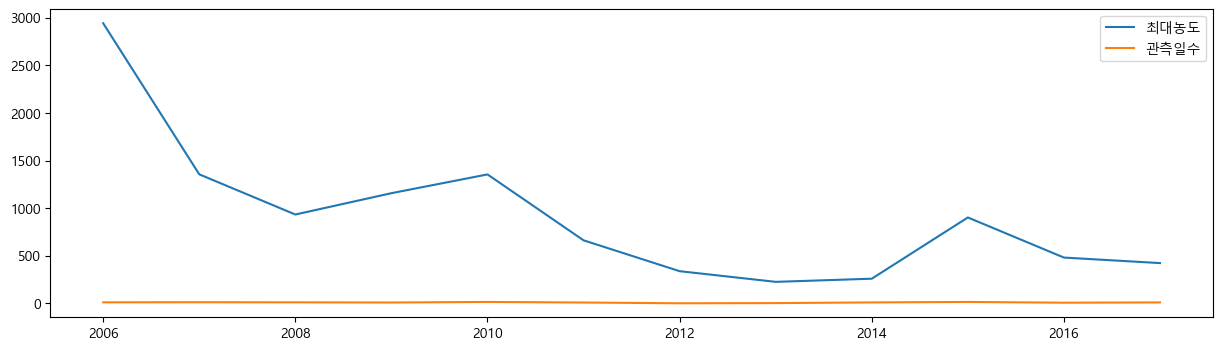

In [29]:
plt.figure(figsize=(15, 4))

plt.plot(df.index, df['최대농도(㎍/㎥/시)'], label="최대농도")
plt.plot(df.index, df['관측일수'], label="관측일수")

# plt.ylim(0, 15)
plt.legend()
plt.show()

In [ ]:
# 한 axes의 여러 데이터를 이용해서 여러 그래프를 그리는 경우. 
#  둘 합쳐서 최소값과 최대값을 기준으로 축의 값의 범위를 잡아준다.
# y축 값의 범위(최대농도와 관측일수중 최소값 ~ 최대농도와 관측일수 중 최대값)

In [27]:
df[['최대농도(㎍/㎥/시)', "관측일수"]].agg(["min", "max"])

,최대농도(㎍/㎥/시),관측일수
min,226,1
max,2941,15


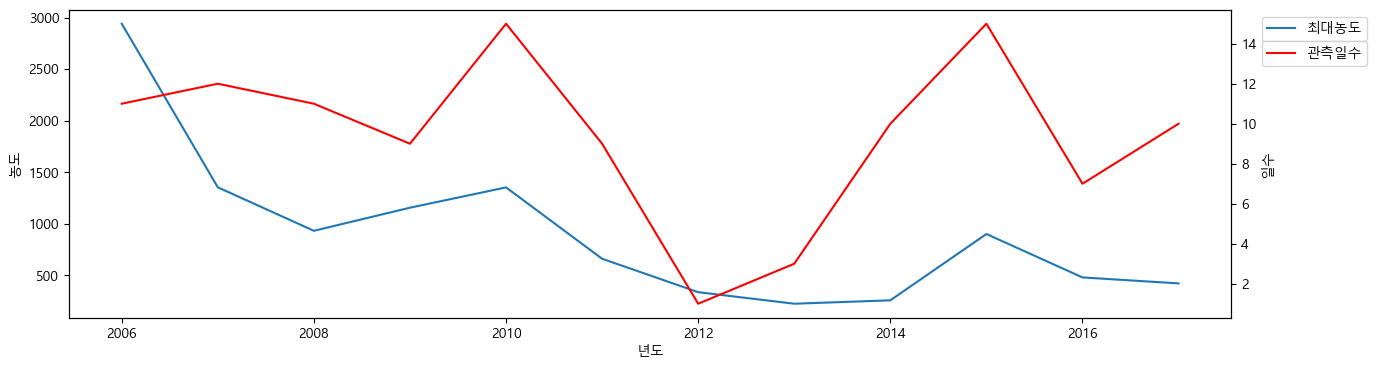

In [45]:
# X 축을 공유하고 y축은 따로 생성
plt.figure(figsize=(15, 4))

# Axes 객체 생성.
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df.index, df['최대농도(㎍/㎥/시)'], label="최대농도")
ax1.set_xlabel("년도")
ax1.set_ylabel("농도")
ax1.legend(bbox_to_anchor=(1.02, 1), loc="upper left")

ax2.plot(df.index, df['관측일수'], color="red",  label="관측일수")
ax2.set_ylabel("일수")
# ax2.legend(loc="upper center")
ax2.legend(bbox_to_anchor=(1.02, 0.92), loc="upper left")
plt.show()

# legend() 위치
## 1.  axes 안쪽에 정해진 위치를 지정
###     - 위/아래 : upper center, lower
###     - 좌/우   : left  center right
###      - 정가운데: center,    알아서 최적의 장소를 선택: best

## 2. 원하는 위치에 지정.
#### bbox_to_anchor=(x축의 위치, y축의 위치),  
#                    loc="위아래   좌우"  # bbox의 어느지점을 bbox_to_anchor에 위치시킬지.
##### X축: 0-----------------------1
##### Y축
#   1
#   |
#  |
#  0

# 산점도 (Scatter Plot) 그리기
## 산점도(산포도)
- X와 Y축을 가지는 좌표평면상 관측값들을 점을 찍어 표시하는 그래프
- 변수(Feature)간의 [상관관계나](#상관계수) 관측값들 간의 군집 분류를 확인할 수 있다.
- `scatter()` 메소드 사용
    - 1번인수 : x축 값, 2번인수 y축 값
    - x와 y값들을 모두 매개변수로 전달해야 한다.
        - x와 y의 원소의 수는 같아야 한다.
    - c/color: 색지정
        - c와 x, y와 같은 원소수를 가지는 Iterable 타입 객체로 설정할 경우 각 마커마다 다른 색상을 설정할 수 있다
    - s: 점 크기 지정
    - marker
        - marker란 점의 모양을 말하며 미리정의된 값으로 변경할 수있다.
        - https://matplotlib.org/stable/api/markers_api.html 

> - ### 상관계수 
>     - 두 변수간의 상관관계(비례/반비례)를 정량적(수치적)으로 계산한 값.
>         - -1 ~ 1 사이의 값이 나온다. 
>         - 양의 상관관계: 0 ~ 1 (비례 관계) 
>         - 음의 상관관계: -1 ~ 0 (반비례 관계)
>         - 절대값 기준 1로 갈수록 두 변수의 상관관계가 강하고 0으로 갈수록 약하다.
>             - 1 ~ 0.7: 아주 강한 상관관계
>             - 0.7 ~ 0.3 : 강한 상관관계
>             - 0.3 ~ 0.1 : 약한 상관관계
>             - 0.1 ~ 0 : 관계없다.

# 막대그래프 (Bar plot) 그리기
## 막대그래프(Bar plot)

- 수량/값의 크기를 비교하기 위해 막대 형식으로 나타낸 그래프
- 범주형 데이터의 class별 개수를 확인할 때 사용
- bar(x, height) 메소드 사용
    - x : x값, height:  막대 높이
        - X는 분류값, height는 개수
- barh(y, width) 메소드
    - 수평막대 그래프
    - 1번인수: y값, 2번인수: 막대 너비  
- 매개변수
    - 첫번째: 수량을 셀 대상
    - 두번째: 수량

# 파이차트(Pie chart)
- 전체 데이터량에서 각 범주(Category)가 차지하는 비율을 나타내는데 사용
- `pie(x, labels)` 이용
    - x: 값 (값들을 100을 기준으로 비율을 계산해 크기 설정)
    - labels : 값들의 label
    - autopct: 조각내에 표시될 비율의 문자열 형식. '%fmt문자' 
        - fmt문자: f(실수), d(정수), %% (%)
- 한국 웹브라우저 점유율을 파이차트로 작성
    - https://www.koreanextweb.kr/front/stats/browser/browserUseStats.do

# 히스토그램(Histogram) 그리기
## 히스토그램

- 도수 분포표를 그래프로 나타낸 것.
    - 도수분포표: 연속형 자료를 특정 구간(bin)으로 나눠 그 빈도를 나타낸 표
        - 빈도 확인이나 **분포**를 볼때 사용한다.
    - X축: 계급(변수구간)의 대표값, Y축: 빈도수
- `hist(data [, bins=계급개수)` 메소드를 사용
    - data: 리스트형의 객체를 전달한다.

# 상자그래프(Boxplot) 그리기
## 상자그래프란
- 연속형 값들의 사분위수, 극단값들을 이용해 값들의 분포를 시각화한다.
- boxplot(x, whis=1.5)
    - x: 데이터셋
    - whis: 극단치 계산시 사용할 값(기본 1.5)
        - IQR을 이용해 극단치 계산하기
            - IQR(Inter Quartile Range): $3분위수 - 1분위수$ 로 중간 50%값의 범위
            - 극단적으로 작은값: 1분위 - $IQR(3분위수-1분위수) * whis$   보다 작은 값들
            - 극단적으로 큰값: 3분위 + $IQR(3분위수-1분위수) * whis$  보다 큰 값들